In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import tensorflow as tf

In [2]:
#read block data
df=pd.read_csv("blocks.csv",header=0)
print(df.shape)
df.head()

(2273345, 7)


,Level,latBlock,lngBlock,month,day,hour,ClientMacAddr
0,0,0,20,4,1,10,1
1,0,0,20,4,2,16,1
2,0,0,20,4,3,10,1
3,0,0,20,4,3,16,1
4,0,0,20,4,3,17,1


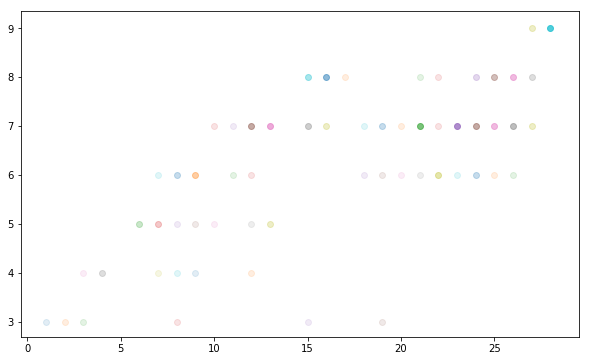

In [3]:
plt.figure(figsize=(10,6))
for i,r in df[(df.Level==5)&(df.month==4)&(df.day==25)&(df.hour==10)].iterrows():
    plt.scatter(r.lngBlock,r.latBlock,alpha=r.ClientMacAddr/8)
plt.show()

In [4]:
pd.set_option('display.max_rows',400)
df[df.Level==5].groupby(by=['latBlock','lngBlock','month','day','hour']).agg({"ClientMacAddr":"sum"})#.\
#reset_index().sort_values(by="ClientMacAddr",ascending=True).head(400)


ClientMacAddr
latBlock lngBlock month day hour               
0        15       7     14  16                1
                        27  13                1
         16       4     4   9                 1
                        13  22                1
                  5     17  21                1
                  7     12  13                1
                        14  12                1
                            19                1
                        17  14                1
                        21  11                2
                            12                1
                        22  17                1
                        28  11                1
         17       4     9   10                1
                        21  11                1
                  5     2   9                 1
                        11  20                1
                        17  21                1
                        23  23                1
                        30  20                1
                  6     3   12                1
                        4   7                 1
                        17  11                1
                  7     2   22                1
                        6   14                2
                            21                1
                        7   14                1
                        10  17                1
                        11  18                1
                            22                1
                        12  19                1
                        13  18                1
                        14  19                1
                        16  17                1
                        17  10                2
                            14                1
                            17                2
                            23                1
                        18  14                1
                        19  17                1
                        20  8                 1
                            16                2
                            19                1
                        21  11                2
                            12                1
                            16                2
                        22  12                1
                        23  18                1
                        26  13                1
                        27  14                2
                            16                1
                            19                1
                        28  11                1
                            19                1
                        29  12                1
                            13                1
                        31  18                1
         18       4     2   10                1
                            19                1
                        3   12                1
                        4   14                1
                            15                1
                        6   11                1
                        7   23                1
                        9   9                 1
                            11                1
                            12                1
                        14  14                1
                  5     4   21                1
                        5   15                1
                            22                1
                        6   14                1
                        10  9                 1
                            14                1
                            19                1
                        15  12                1
                        16  11                1
                        17  16                1
                            21                1
                  6     3   12                1
                        29  16                1
                        30  11                1
  

In [5]:
#define which block to be trained
lat=0
lng=15
month=7
day=14
hour=16
#get the nearby blocks
print(df[(df.latBlock==lat) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)])
block=[]



#first decribe the count of this block 
block.append(int(df[(df.latBlock==lat) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']))




#second decribe the average of upper left lower right block
count_card=0
sum_card=0
upper=df[(df.latBlock==lat-1) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
if len(upper)>0:
    count_card=count_card+1
    sum_card=sum_card+int(upper)
    
lower=df[(df.latBlock==lat+1) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
if len(lower)>0:
    count_card=count_card+1
    sum_card=sum_card+int(lower)
    
left=df[(df.latBlock==lat) & (df.lngBlock==lng-1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
if len(left)>0:
    count_card=count_card+1
    sum_card=sum_card+int(left)

right=df[(df.latBlock==lat) & (df.lngBlock==lng+1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
if len(right)>0:
    count_card=count_card+1
    sum_card=sum_card+int(right)

if count_card>0:
    avg_card=sum_card/count_card
else:
    avg_card=0
print(avg_card)
block.append(avg_card)



#third decrible intercardinal blocks
count_intercard=0
sum_intercard=0
block_inter1=df[(df.latBlock==lat-1) & (df.lngBlock==lng-1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
if len(block_inter1)>0:
    count_intercard=count_intercard+1
    sum_intercard=sum_intercard+int(block_inter1)
    
block_inter2=df[(df.latBlock==lat-1) & (df.lngBlock==lng+1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
if len(block_inter2)>0:
    count_intercard=count_intercard+1
    sum_intercard=sum_intercard+int(block_inter2)
    
block_inter3=df[(df.latBlock==lat+1) & (df.lngBlock==lng-1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
if len(block_inter3)>0:
    count_intercard=count_intercard+1
    sum_intercard=sum_intercard+int(block_inter3)

block_inter4=df[(df.latBlock==lat+1) & (df.lngBlock==lng+1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
if len(block_inter4)>0:
    count_intercard=count_intercard+1
    sum_intercard=sum_intercard+int(block_inter4)

if count_intercard>0:
    avg_intercard=sum_intercard/count_intercard
else:
    avg_intercard=0
print(avg_intercard)
block.append(avg_intercard)

         Level  latBlock  lngBlock  month  day  hour  ClientMacAddr
2160740      5         0        15      7   14    16              1
0
1.0


In [6]:
def date_prepare(df,lat=0,lng=15,month=7,day=14,hour=16):
        #get the nearby blocks
    print(df[(df.latBlock==lat) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)])
    block=[]



    #first decribe the count of this block 
    if len(df[(df.latBlock==lat) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr'])>0:
        block.append(int(df[(df.latBlock==lat) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']))
    else:
        block.append(0)
            



    #second decribe the average of upper left lower right block
    count_card=0
    sum_card=0
    upper=df[(df.latBlock==lat-1) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(upper)>0:
        count_card=count_card+1
        sum_card=sum_card+int(upper)

    lower=df[(df.latBlock==lat+1) & (df.lngBlock==lng) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(lower)>0:
        count_card=count_card+1
        sum_card=sum_card+int(lower)

    left=df[(df.latBlock==lat) & (df.lngBlock==lng-1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(left)>0:
        count_card=count_card+1
        sum_card=sum_card+int(left)

    right=df[(df.latBlock==lat) & (df.lngBlock==lng+1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(right)>0:
        count_card=count_card+1
        sum_card=sum_card+int(right)

    if count_card>0:
        avg_card=sum_card/count_card
    else:
        avg_card=0
    print(avg_card)
    block.append(avg_card)



    #third decrible intercardinal blocks
    count_intercard=0
    sum_intercard=0
    block_inter1=df[(df.latBlock==lat-1) & (df.lngBlock==lng-1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(block_inter1)>0:
        count_intercard=count_intercard+1
        sum_intercard=sum_intercard+int(block_inter1)

    block_inter2=df[(df.latBlock==lat-1) & (df.lngBlock==lng+1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(block_inter2)>0:
        count_intercard=count_intercard+1
        sum_intercard=sum_intercard+int(block_inter2)

    block_inter3=df[(df.latBlock==lat+1) & (df.lngBlock==lng-1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(block_inter3)>0:
        count_intercard=count_intercard+1
        sum_intercard=sum_intercard+int(block_inter3)

    block_inter4=df[(df.latBlock==lat+1) & (df.lngBlock==lng+1) & (df.month==month) &(df.day==day) &(df.hour==hour)]['ClientMacAddr']
    if len(block_inter4)>0:
        count_intercard=count_intercard+1
        sum_intercard=sum_intercard+int(block_inter4)

    if count_intercard>0:
        avg_intercard=sum_intercard/count_intercard
    else:
        avg_intercard=0
    print(avg_intercard)
    block.append(avg_intercard)
    return block


In [7]:
#print(date_prepare(df,0,15,7,14,16))
data_set=[]
for i in range(0,23):
    data_set.append(date_prepare(df,0,15,7,14,i))
    #print(date_prepare(df,0,15,7,14,i))
print(data_set)

Empty DataFrame
Columns: [Level, latBlock, lngBlock, month, day, hour, ClientMacAddr]
Index: []
0
0
Empty DataFrame
Columns: [Level, latBlock, lngBlock, month, day, hour, ClientMacAddr]
Index: []
0
0
Empty DataFrame
Columns: [Level, latBlock, lngBlock, month, day, hour, ClientMacAddr]
Index: []
0
0
Empty DataFrame
Columns: [Level, latBlock, lngBlock, month, day, hour, ClientMacAddr]
Index: []
0
0
Empty DataFrame
Columns: [Level, latBlock, lngBlock, month, day, hour, ClientMacAddr]
Index: []
0
0
Empty DataFrame
Columns: [Level, latBlock, lngBlock, month, day, hour, ClientMacAddr]
Index: []
0
0
Empty DataFrame
Columns: [Level, latBlock, lngBlock, month, day, hour, ClientMacAddr]
Index: []
0
0
Empty DataFrame
Columns: [Level, latBlock, lngBlock, month, day, hour, ClientMacAddr]
Index: []
0
0
Empty DataFrame
Columns: [Level, latBlock, lngBlock, month, day, hour, ClientMacAddr]
Index: []
0
0
Empty DataFrame
Columns: [Level, latBlock, lngBlock, month, day, hour, ClientMacAddr]
Index: []
0
1.

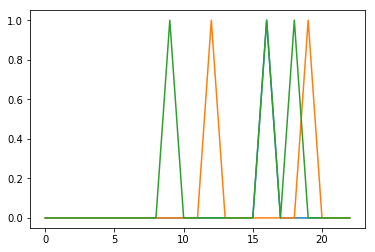

In [8]:
plt.figure()
plt.plot(data_set)
plt.show()

In [9]:
data=data_set
print(data_set)
#normalize data
normalize_data=(data-np.mean(data))/np.std(data)  
normalize_data=normalize_data[:,np.newaxis] 
k=[]
for i in normalize_data:
    a=[]
    for r in i[0]:
        b=[]
        b.append(r)
        a.append(b)
    k.append(a)
print(k)
normalize_data=k


[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 1.0], [0, 0, 0], [0, 0, 0], [0, 1.0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 0, 1.0], [0, 0, 0], [0, 0, 1.0], [0, 1.0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
[[[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [3.24037034920393]], [[-0.3086066999241838], [-0.

In [10]:
train_out=[]
for i in normalize_data:
    print(i[2])
    #empty_array=[]
    #empty_array.append(i[2])
    #empty_array.append(i[2])
    #empty_array.append(i[2])
    train_out.append(i[2])

normalize_data=k

train_in=normalize_data
#print(train_in)
#print(train_in)
#print('###########')
print(train_out)



[-0.3086066999241838]
[-0.3086066999241838]
[-0.3086066999241838]
[-0.3086066999241838]
[-0.3086066999241838]
[-0.3086066999241838]
[-0.3086066999241838]
[-0.3086066999241838]
[-0.3086066999241838]
[3.24037034920393]
[-0.3086066999241838]
[-0.3086066999241838]
[-0.3086066999241838]
[-0.3086066999241838]
[-0.3086066999241838]
[-0.3086066999241838]
[3.24037034920393]
[-0.3086066999241838]
[3.24037034920393]
[-0.3086066999241838]
[-0.3086066999241838]
[-0.3086066999241838]
[-0.3086066999241838]
[[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [3.24037034920393], [-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [3.24037034920393], [-0.3086066999241838], [3.24037034920393], [-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [-0.3

In [11]:
NUM_EXAMPLES=12
test_input=train_in[NUM_EXAMPLES:]
test_output=train_out[NUM_EXAMPLES:]

train_input=train_in[:NUM_EXAMPLES]
train_output=train_out[:NUM_EXAMPLES]

print(train_input)

print('$$$$')

print(train_output)

data = tf.placeholder(tf.float32, [None, 3,1])
target = tf.placeholder(tf.float32, [None, 1])

num_hidden = 24
# cell = tf.nn.rnn_cell.LSTMCell(num_hidden,state_is_tuple=True)
cell = tf.contrib.rnn.LSTMCell(num_hidden,state_is_tuple=True)

val, _ = tf.nn.dynamic_rnn(cell, data, dtype=tf.float32)
val = tf.transpose(val, [1, 0, 2])
last = tf.gather(val, int(val.get_shape()[0]) - 1)
weight = tf.Variable(tf.truncated_normal( [num_hidden, int(target.get_shape()[1])] ))

bias = tf.Variable(tf.constant(0.1, shape=[target.get_shape()[1]]))

prediction = tf.nn.softmax(tf.matmul(last, weight) + bias)

cross_entropy = -tf.reduce_sum(target * tf.log(tf.clip_by_value(prediction,1e-10,1.0)))

optimizer = tf.train.AdamOptimizer()
minimize = optimizer.minimize(cross_entropy)

mistakes = tf.not_equal(tf.argmax(target, 1), tf.argmax(prediction, 1))
error = tf.reduce_mean(tf.cast(mistakes, tf.float32))

init_op = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init_op)
batch_size = 2
no_of_batches = int(len(train_input) / batch_size)
epoch = 20
for i in range(epoch):
    ptr = 0
    for j in range(no_of_batches):
        inp, out = train_input[ptr:ptr + batch_size], train_output[ptr:ptr + batch_size]
        ptr += batch_size
        sess.run(minimize, {data: inp, target: out})
    print
    "Epoch ", str(i)

incorrect = sess.run(error, {data: test_input, target: test_output})



print(1-incorrect)

sess.close()

[[[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [3.24037034920393]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]], [[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838]]]
$$$$
[[-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [-0.3086066999241838], [-0.30

E:\anaconda\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1.0
